## Advanced Regression Assignment 
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.<br>
### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [316]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from math import sqrt

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

#Machine learning Libraries

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1. Data reading and understanding

In [317]:
#Importing dataset
housing_df=pd.read_csv("train.csv")

In [318]:
#Let's explore the top 5 rows
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [319]:
housing_df.shape

(1460, 81)

In [320]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [321]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This shows the presence of a lot of null data in the dataset. For this, there is a requirement of data cleaning.

In [322]:
housing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Step 2. Data Cleaning

#### 2.1 Check for null values

In [323]:
# Calculating the % of null values for the entire dataset
round(housing_df.isnull().sum()/len(housing_df.index),2).sort_values(ascending=False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
Id              0.00
Functional      0.00
dtype: float64

In [324]:
## dropping the column having more then 40% null values
round(housing_df.isnull().sum()/len(housing_df.index),2)[round(housing_df.isnull().sum()/
                                                                 len(housing_df.index),2).values>0.40]

Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [325]:
housing_df = housing_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis='columns')

In [326]:
# shape of data after dropping null valued columns
housing_df.shape

(1460, 77)

In [327]:
## Checking the columns where the missing values between 0-10%
round(housing_df.isnull().sum()/len(housing_df.index),2)[round(housing_df.isnull().sum()/
                                                                 len(housing_df.index),2).values>0.00]

LotFrontage     0.18
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
FireplaceQu     0.47
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

#### 2.1 Impute missing value

In [328]:
# The NAN values in the categorical columns will be replaced by NA, 
# and in numerical columns by the median value of the column values
housing_df.LotFrontage.fillna(housing_df.LotFrontage.median(),inplace=True)
housing_df.MasVnrType.fillna('None',inplace=True)
housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median(),inplace=True)
housing_df.BsmtQual.fillna('NA',inplace=True)
housing_df.BsmtCond.fillna('NA',inplace=True)
housing_df.BsmtExposure.fillna('NA',inplace=True)
housing_df.BsmtFinType1.fillna('NA',inplace=True)
housing_df.BsmtFinType2.fillna('NA',inplace=True)
housing_df.GarageType.fillna('NA',inplace=True)
housing_df.GarageYrBlt.fillna(0,inplace=True)
housing_df.GarageFinish.fillna('NA',inplace=True)
housing_df.GarageQual.fillna('NA',inplace=True)
housing_df.GarageCond.fillna('NA',inplace=True)
housing_df.FireplaceQu.fillna('NA',inplace=True)

In [329]:
## Removed the row where Electrical was null
housing_df=housing_df[~housing_df.Electrical.isna()]

In [330]:
housing_df.shape

(1459, 77)

In [331]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Now there are no missing and null values in the dataset.

#### 2.3 Removing redundant & unwanted columns
As observed from the data , some columns can be dropped out.
such as : Id, PoolArea, Street,Utilities

In [332]:
columnsToDrop=['Id','PoolArea','Street','Utilities']
housing_df = housing_df.drop(columnsToDrop,axis='columns')

In [333]:
housing_df.shape

(1459, 73)

#### 2.4 Removing outliers from numerical columns

In [334]:
## Numerical columns in data set are :
numerical_cols=list(housing_df.dtypes[housing_df.dtypes!='object'].index)

In [335]:
print("Number of numerical columns are : ",len(numerical_cols))

Number of numerical columns are :  36


- MSSubClass--> type of dwelling
- LotFrontage--> feet of street connected to property
- LotArea--> Lot size
- OverallQual--> Rate of overall material and finish
- OverallCond--> Rate overall condition
- YearBuilt--> construction date
- YearRemodAdd--> remodel date
- MasVnrArea--> masonary area
- BsmtFinSF1--> type 1 finished area
- BsmtFinSF2--> type 2 finished area
- BsmtUnfSF--> unfinished basement area
- TotalBsmtSF--> total basement area
- 1stFlrSF--> 1st flor area
- 2ndFlrSF--> 2nd floor area
- LowQualFinSF--> low quality finished area
- GrLivArea--> above ground living area
- BsmtFullBath--> Basement full bathrooms
- BsmtHalfBath--> Basement half bathrooms
- FullBath--> Full bathrooms above grade
- HalfBath--> Half baths above grade
- BedroomAbvGr-->
- KitchenAbvGr-->
- TotRmsAbvGrd-->Total rooms above grade
- Fireplaces--> no. of fireplaces
- GarageYrBlt-->
- GarageCars--> size of garage in cars
- GarageArea--> size in area
- WoodDeckSF--> wood deck area
- OpenPorchSF--> open porch area
- EnclosedPorch--> enclosed porch area
- 3SsnPorch--> three season porch area
- ScreenPorch--> screen porch area
- MiscVal--> $ value of misc features
- MoSold--> month sold
- YrSold--> year sold
- SalePrice -->Sale price

In [336]:
housing_df[numerical_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,56.881426,42.310746,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,69.861549,22.035077,21.0,60.0,69.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.575737,1.113079,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0


From above we can observe that for some columns mean and median have huge gap. 
It means these columns require outlier treatment.

Such columns are :
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 2ndFlrSF
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- MiscVal
- SalePrice

In [337]:
def drop_outliers(x):
    list = []
    for col in numerical_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_df = drop_outliers(housing_df)

In [338]:
## Categorical columns in data set are :
categorical_cols=list(housing_df.dtypes[housing_df.dtypes=='object'].index)

In [339]:
print("Number of categorical columns are : ",len(categorical_cols))

Number of categorical columns are :  37


- MSSubClass
- OverallQual
- OverallCond
- MSZoning -->  zoning classification of the sale
- LotShape -->  gen shape of property
- LandContour --> Flatness of the property
- LotConfig --> Lot configuration
- LandSlope --> slope
- Neighborhood --> 
- Condition1 --> Proximity to various conditions
- Condition2 --> Proximity to various conditions
- BldgType --> type of building
- HouseStyle --> style
- RoofStyle --> roof style
- RoofMatl --> roof material
- Exterior1st --> Exterior covering on house
- Exterior2nd --> Exterior2nd
- MasVnrType --> Masonry veneer type
- ExterQual --> quality of the material on the exterior
- ExterCond --> present condition of the material on the exterior
- Foundation --> type of foundation
- BsmtQual --> Evaluates the height of the basement
- BsmtCond --> Evaluates the general condition of the basement
- BsmtExposure --> walkout or garden level walls
- BsmtFinType1 --> Rating of basement finished area
- BsmtFinType2 --> BsmtFinType2
- Heating --> Type of heating
- HeatingQC --> Heating Quality and condition
- CentralAir --> Central air conditioning
- Electrical --> Electrical system
- KitchenQual --> 
- Functional --> Home functionality
- GarageType --> Garage location
- GarageFinish --> Interior finish of the garage
- GarageQual --> Garage quality
- GarageCond --> Garage condition
- PavedDrive --> 
- SaleType --> Type of sale
- SaleCondition--> Condition of Sale

In [340]:
for c in housing_df.columns:
    if housing_df[c].dtype == np.object :
        print("--------------------------")
        print(housing_df[c].value_counts())

--------------------------
RL         1086
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64
--------------------------
Reg    855
IR1    463
IR2     38
IR3      8
Name: LotShape, dtype: int64
--------------------------
Lvl    1235
Bnk      53
HLS      46
Low      30
Name: LandContour, dtype: int64
--------------------------
Inside     980
Corner     246
CulDSac     90
FR2         44
FR3          4
Name: LotConfig, dtype: int64
--------------------------
Gtl    1296
Mod      60
Sev       8
Name: LandSlope, dtype: int64
--------------------------
NAmes      215
CollgCr    147
OldTown    101
Somerst     86
Gilbert     78
Edwards     77
NridgHt     77
NWAmes      72
Sawyer      70
SawyerW     58
Crawfor     50
BrkSide     48
Mitchel     44
NoRidge     41
Timber      35
IDOTRR      29
ClearCr     25
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int

In [341]:
housing_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','Functional','FireplaceQu']].head().transpose()

,0,1,2,3,4
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
ExterQual,Gd,TA,Gd,TA,Gd
BsmtQual,Gd,Gd,Gd,TA,Gd
BsmtCond,TA,TA,TA,Gd,TA
BsmtExposure,No,Gd,Mn,No,Av
BsmtFinType1,GLQ,ALQ,GLQ,ALQ,GLQ
BsmtFinType2,Unf,Unf,Unf,Unf,Unf
HeatingQC,Ex,Ex,Ex,Gd,Ex
CentralAir,Y,Y,Y,Y,Y
KitchenQual,Gd,TA,Gd,Gd,Gd


The above columns have some kind of order and hence we can say these are ordinal in nature. We will map these ordinals in the Data preparation step.

#### 2.5 Change Data types

In [342]:
def convertDtype(colList,dtype):
    for col in colList:
        housing_df[col] = housing_df[col].astype(dtype)

In [343]:
#Convert to object dtype
convertDtype(['MSSubClass'],'object')

## Step 3. Data Visualization

#### 3.1 pairplots for continuous numeric variables

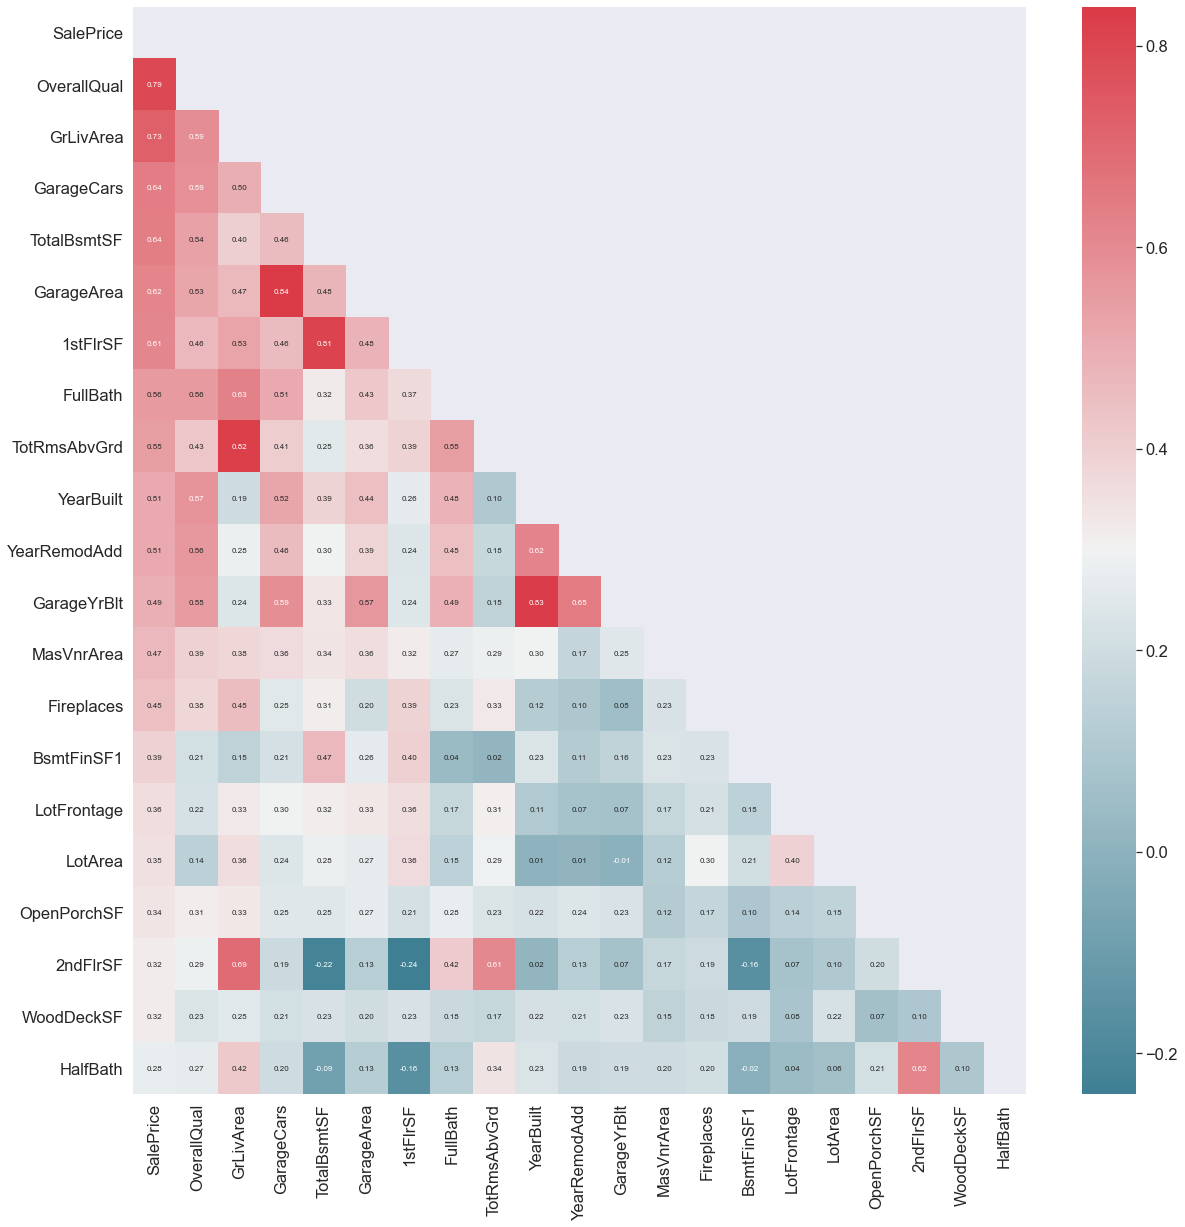

In [344]:
corr = housing_df[housing_df.SalePrice>1].corr()
top_corr_cols = corr[abs((corr.SalePrice)>=.26)].SalePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"fontsize":8}, fmt=".2f", mask=dropSelf)
sns.set(font_scale=0.5)
plt.show()
del corr, dropSelf, top_corr

<b>Observation :</b>
The heatmap shows some useful insights:

Correlation of target variable(SalePrice) with independent variables:
- Price is highly (positively) correlated with OverallQual(.79) and GrLivArea (0.73). We expect the overall quality of the house and size of the living area to have a greater influence on our value judgments about a property.

- Others are : TotalBsmtSF,1stFlrSF,GarageCars,GarageArea

From the graph above, it also becomes clear the multicollinearity is an issue.

- The correlation between GarageCars and GarageArea is very high (0.84), and has very close correlation with the SalePrice.
- From total square feet of basement area (TotalBsmtSF) and first Floor square feet (1stFlrSF), we found 0.81 of correlation and same correlation with sale price (0.61).
- Original construction date (YearBuilt) has a little more correlation with price (0.51) than GarageYrBlt (0.49), and a high correlation between them (0.83)
- 0.83 is the correlation between total rooms above grade not include bathrooms (TotRmsAbvGrd) and GrLivArea, but TotRmsAbvGrd has only 0.51 of correlation with sale price.
Let's see their distributions and type of relation curve between the 10th features with largest correlation with sales price,

#### 3.2 Correlations for numeric variables

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

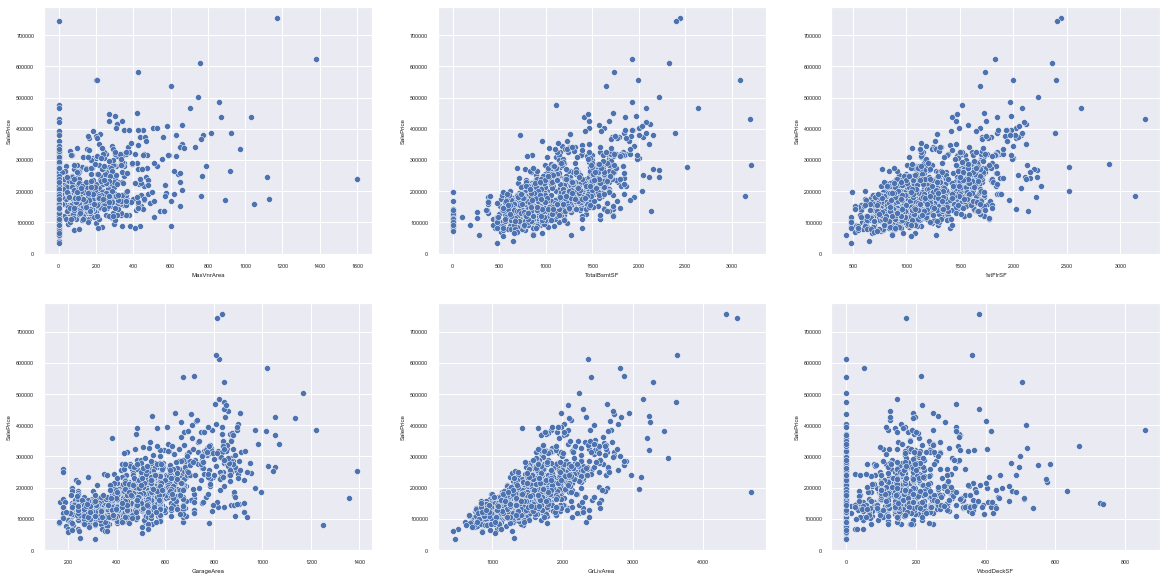

In [345]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.scatterplot(x=housing_df.MasVnrArea,y=housing_df.SalePrice)
plt.subplot(2,3,2)
sns.scatterplot(x=housing_df.TotalBsmtSF,y=housing_df.SalePrice)
plt.subplot(2,3,3)
sns.scatterplot(x=housing_df['1stFlrSF'],y=housing_df.SalePrice)
plt.subplot(2,3,4)
sns.scatterplot(x=housing_df['GarageArea'],y=housing_df.SalePrice)
plt.subplot(2,3,5)
sns.scatterplot(x=housing_df['GrLivArea'],y=housing_df.SalePrice)
plt.subplot(2,3,6)
sns.scatterplot(x=housing_df['WoodDeckSF'],y=housing_df.SalePrice)

#### 3.3 Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

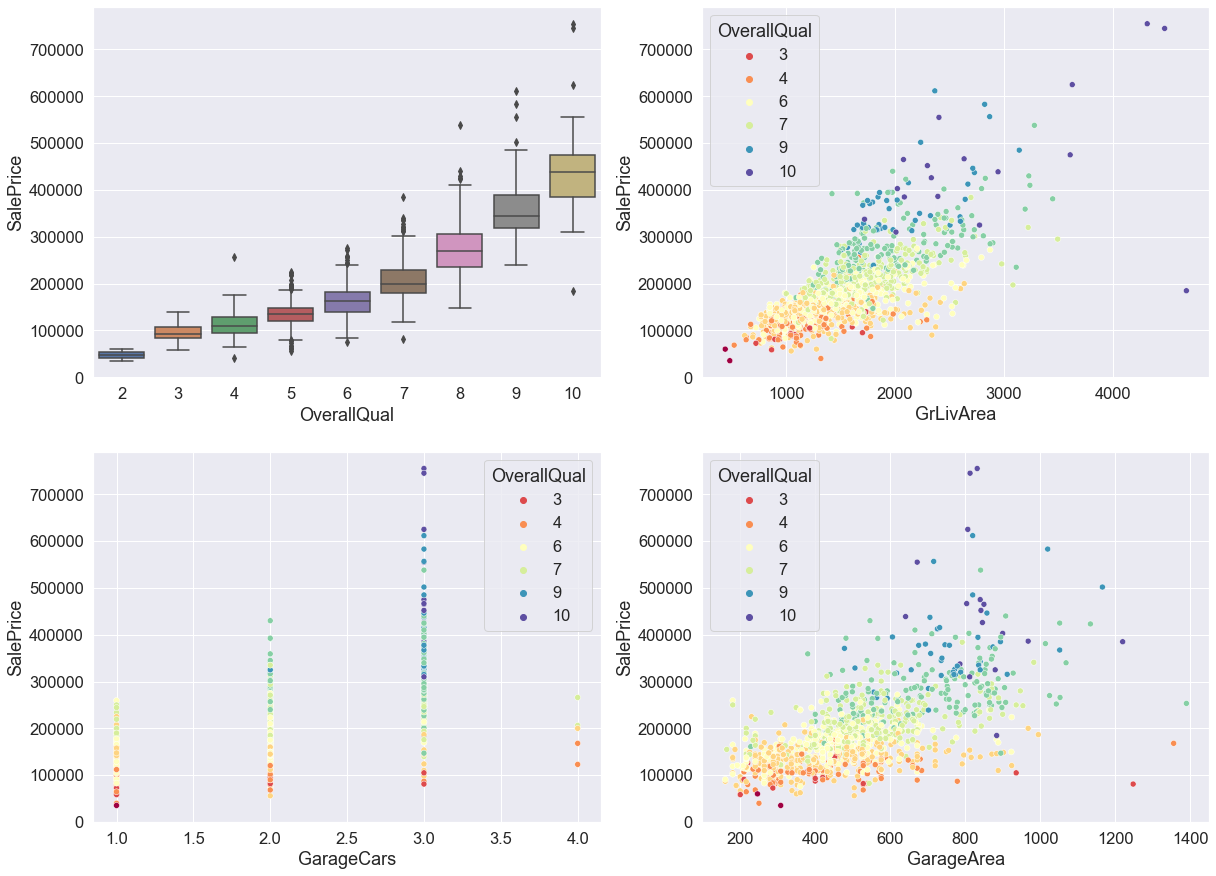

In [346]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=housing_df[['SalePrice', 'OverallQual']])

# GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = housing_df.GrLivArea, y = housing_df.SalePrice, hue=housing_df.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = housing_df.GarageCars, y = housing_df.SalePrice, hue=housing_df.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = housing_df.GarageArea, y = housing_df.SalePrice, hue=housing_df.OverallQual, palette= 'Spectral')


Check the Dependent Variable - SalePrice:

In [347]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

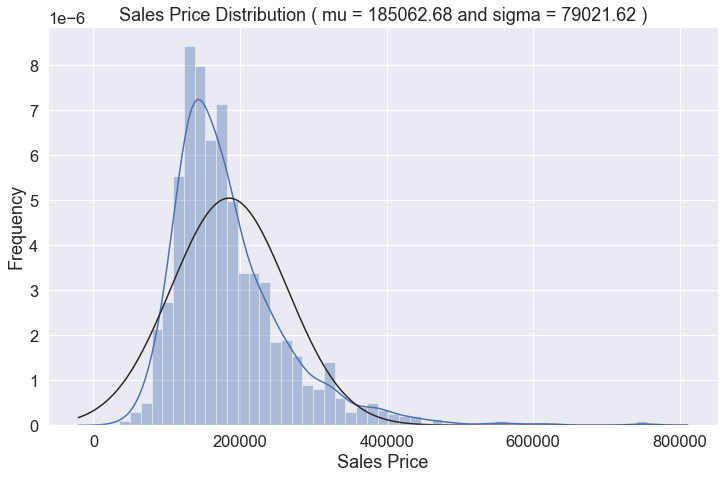

In [348]:
QQ_plot(housing_df.SalePrice, 'Sales Price')

## Step 4. Data Preparation for Linear Regression

In [349]:
housing_df['LandSlope'] = housing_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['ExterQual'] = housing_df.ExterQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtQual'] = housing_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df.CentralAir.map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['ExterCond'] = housing_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['LotShape'] = housing_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Functional'] = housing_df.Functional.map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
housing_df['FireplaceQu'] = housing_df.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})



In [350]:
housing_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','Functional','FireplaceQu']].head().transpose()

,0,1,2,3,4
LandSlope,0,0,0,0,0
ExterQual,4,3,4,3,4
BsmtQual,4,4,4,3,4
BsmtCond,3,3,3,4,3
BsmtExposure,1,4,2,1,3
BsmtFinType1,6,5,6,5,6
BsmtFinType2,1,1,1,1,1
HeatingQC,4,4,4,3,4
CentralAir,1,1,1,1,1
KitchenQual,3,2,3,3,3


In [351]:
## Numerical columns in data set are :
numerical_cols=list(housing_df.dtypes[housing_df.dtypes!='object'].index)
print("Number of numerical columns are : ",len(numerical_cols))
## Categorical columns in data set are :
categorical_cols=list(housing_df.dtypes[housing_df.dtypes=='object'].index)
print("Number of categorical columns are : ",len(categorical_cols))

Number of numerical columns are :  52
Number of categorical columns are :  21


In [352]:
housing_df.shape

(1364, 73)

In [353]:
for c in housing_df.columns:
    if housing_df[c].dtype == np.object :
        print("--------------------------")
        print(housing_df[c].value_counts())

--------------------------
20     514
60     297
50     129
120     87
160     61
80      57
70      56
30      51
90      39
85      20
190     20
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64
--------------------------
RL         1086
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64
--------------------------
Lvl    1235
Bnk      53
HLS      46
Low      30
Name: LandContour, dtype: int64
--------------------------
Inside     980
Corner     246
CulDSac     90
FR2         44
FR3          4
Name: LotConfig, dtype: int64
--------------------------
NAmes      215
CollgCr    147
OldTown    101
Somerst     86
Gilbert     78
Edwards     77
NridgHt     77
NWAmes      72
Sawyer      70
SawyerW     58
Crawfor     50
BrkSide     48
Mitchel     44
NoRidge     41
Timber      35
IDOTRR      29
ClearCr     25
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2


#### Transform Years to Ages and Create Flags to New and Remod

In [354]:
# We can derive age of house, age of remodelling, garage age of house
housing_df['Build_Age'] = housing_df.YearBuilt.max()-housing_df.YearBuilt
housing_df['Remod_Age'] = housing_df.YearRemodAdd.max()-housing_df.YearRemodAdd
housing_df['Garage_Age'] = housing_df.GarageYrBlt.max()-housing_df.GarageYrBlt
housing_df['Garage_Age'] = housing_df['Garage_Age'].astype('int')
#housing_df['Sold_Age'] = housing_df.YrSold.max()-housing_df.YrSold
housing_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','Build_Age','Remod_Age',
             'Garage_Age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Build_Age,Remod_Age,Garage_Age
41,1959,1959,1959.0,2007,51,51,51
992,1964,1993,1964.0,2007,46,17,46
838,1995,2006,1999.0,2008,15,4,11
356,1992,1992,1992.0,2009,18,18,18
854,1955,1974,1955.0,2006,55,36,55
771,1951,1951,1951.0,2006,59,59,59
135,1970,1970,1970.0,2008,40,40,40
1242,1974,1974,1974.0,2010,36,36,36
1079,1994,1994,1996.0,2007,16,16,14
145,2004,2006,2004.0,2006,6,4,6


In [355]:
housing_df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [356]:
## Numerical columns in data set are :
numerical_cols=list(housing_df.dtypes[housing_df.dtypes!='object'].index)
print("Number of numerical columns are : ",len(numerical_cols))
## Categorical columns in data set are :
categorical_cols=list(housing_df.dtypes[housing_df.dtypes=='object'].index)
print("Number of categorical columns are : ",len(categorical_cols))

Number of numerical columns are :  51
Number of categorical columns are :  21


In [357]:
categorical_cols

['MSSubClass',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Creating and joining dummy column with the actual dataset

In [358]:
dummy_col = pd.get_dummies(housing_df[['MSSubClass','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

housing_df = pd.concat([housing_df,dummy_col],axis='columns')

housing_df = housing_df.drop(['MSSubClass','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [359]:
housing_df.shape

(1364, 201)

In [360]:
## Numerical columns in data set are :
numerical_cols=list(housing_df.dtypes[housing_df.dtypes!='object'].index)
print("Number of numerical columns are : ",len(numerical_cols))
## Categorical columns in data set are :
categorical_cols=list(housing_df.dtypes[housing_df.dtypes=='object'].index)
print("Number of categorical columns are : ",len(categorical_cols))

Number of numerical columns are :  201
Number of categorical columns are :  0


## Step 5. Splitting the data into Train & Test Dataset

In [361]:
saved_housing_df=housing_df

In [362]:
# This is used when accidently the data gets change
#housing_df=saved_housing_df

#### 5.1 Splitting the data

Creating train and test dataset for validation purpose

In [363]:
housing_train, housing_test = train_test_split(housing_df, train_size = 0.7, random_state = 100)

In [364]:
housing_train.shape

(954, 201)

In [365]:
housing_test.shape

(410, 201)

#### 5.2 Rescalling bike_train dataframe using MinMaxCcaler

Scaling the train dataset as scale of our dependent valriable SalePrice is very different with the independent variable.

In [366]:
scaler = MinMaxScaler()
housing_train[numerical_cols] = scaler.fit_transform(housing_train[numerical_cols])
housing_test[numerical_cols] = scaler.transform(housing_test[numerical_cols])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

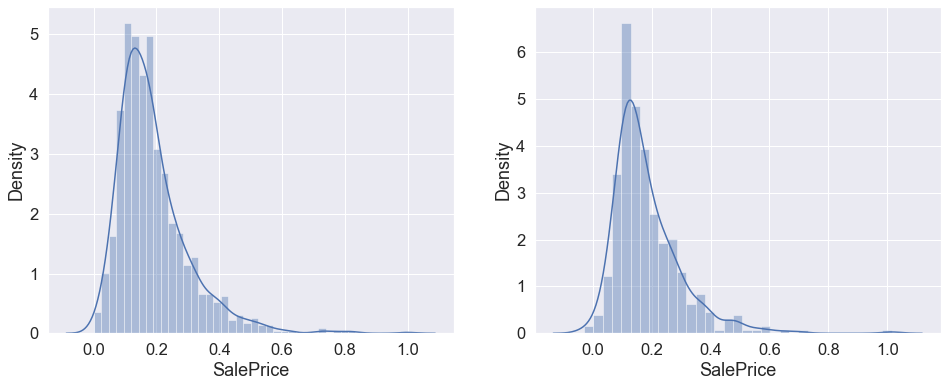

In [367]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(housing_train.SalePrice)
plt.subplot(122)
sns.distplot(housing_test.SalePrice)

## Step 6. Linear Model Building -- Without Regularisation

#### 6.1 Dividing into X and Y sets for the model building

In [368]:
y_train = housing_train.pop('SalePrice')
X_train = housing_train

In [369]:
y_test = housing_test.pop('SalePrice')
X_test = housing_test

#### 6.2 Building model with all variables

In [370]:
lm = LinearRegression()

In [371]:
# fit the model on the x_train & y_train
lm.fit(X_train,y_train)

LinearRegression()

In [372]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train : ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test : ",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 train :  0.9283256630868496
R2 test :  -5.970360661279593e+21
RSS train :  0.8942946660641785
RSS test :  3.2585448227821316e+22
MSE train :  0.0009374157925201033
MSE test :  7.947670299468613e+19


# Model Building with Regularisation - Ridge and Lasso Regression

## Step 7. Ridge Regression

Let's now try predicting house sale prices based on ridge regression.

### 7.1 Model making

In [373]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring='neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### 7.2 Optimal Lambda for Ridge Regression

In [374]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 5.0}
-0.02628177001830425


#### Alpha =5 is the best lambda value for Ridge Regression

In [375]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)

Ridge(alpha=5)

### 7.3 Model Coefficients

In [376]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [377]:
# Top 10 features along with their coefficients with Ridge Regression
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,OverallCond,0.092525
24,BsmtFullBath,0.089870
21,2ndFlrSF,0.078730
14,BsmtFinType2,0.074283
22,LowQualFinSF,0.066545
18,HeatingQC,0.066145
2,LotShape,0.048120
6,MasVnrArea,0.041537
91,Neighborhood_OldTown,0.040970
31,TotRmsAbvGrd,0.040548


### 7.4 Model Analysis

In [378]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train : ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test : ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 train :  0.9141213877444854
R2 test :  0.8314181154072012
RSS train :  1.071524176947209
RSS test :  0.9200978942819582
MSE train :  0.0011231909611605965
MSE test :  0.0022441412055657518


### 7.5 Residual analysis on Ridge model

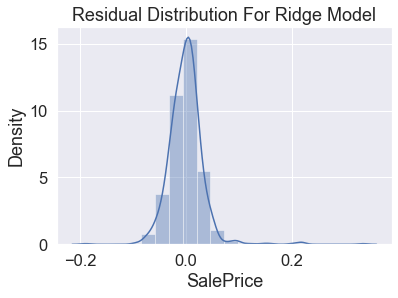

In [379]:
res = y_train - y_pred_train
sns.distplot(res,bins=20)
plt.title('Residual Distribution For Ridge Model')
plt.show()

## Step 8. Lasso Regression

### 8.1 Model making

In [380]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### 8.2 Optimal Lambda for Ridge Regression

In [381]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [382]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

### 8.3 Model Coefficients

In [383]:
model_lasso_param = list(lasso.coef_)
model_lasso_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_lasso_param)))
lasso_coef.columns = ['Feaure','Coef']

In [384]:
# Top 10 features along with their coefficients with Lasso Regression
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.315240
5,OverallCond,0.131956
18,HeatingQC,0.115684
2,LotShape,0.085616
14,BsmtFinType2,0.076192
6,MasVnrArea,0.054726
33,Fireplaces,0.051725
91,Neighborhood_OldTown,0.044104
31,TotRmsAbvGrd,0.038309
7,ExterQual,0.036576


In [385]:
#Number of parameters selected by the Lasso regression, as lasso use to do feature selection by converging not required feature 
# cofficent value as 0
lasso_coef = lasso_coef.loc[lasso_coef['Coef'] != 0]
lasso_coef

,Feaure,Coef
0,LotFrontage,-0.191813
1,LotArea,0.031771
2,LotShape,0.085616
5,OverallCond,0.131956
6,MasVnrArea,0.054726
7,ExterQual,0.036576
8,ExterCond,0.006047
9,BsmtQual,-0.004084
10,BsmtCond,0.000232
11,BsmtExposure,-0.013328


In [386]:
#Number of parameters selected by the Lasso regression, Minus one as we have constant present in lasso_params_df
len(lasso_coef)-1

100

### 8.4 Model Analysis

In [387]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS train : ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS test : ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 train :  0.9179846620737784
R2 test :  0.8140039466379791
RSS train :  1.0233213504541532
RSS test :  1.0151421515812165
MSS train :  0.0010726638893649404
MSS test :  0.0024759564672712595


### 8.5 Residual analysis on Lasso model

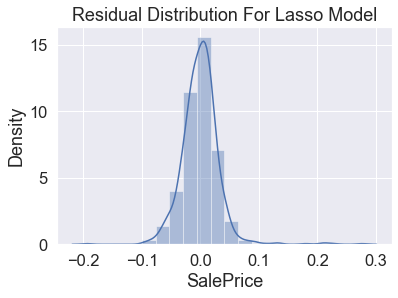

In [388]:
res = y_train - y_pred_train
sns.distplot(res,bins=20)
plt.title('Residual Distribution For Lasso Model')
plt.show()

## Step 9. Comparing Linear Regression , Ridge and Lasso Regression

In [389]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.283257e-01,0.914121,0.917985
1,R2 Score (Test),-5.970361e+21,0.831418,0.814004
2,RSS (Train),8.942947e-01,1.071524,1.023321
3,RSS (Test),3.258545e+22,0.920098,1.015142
4,MSE (Train),3.061725e-02,0.033514,0.032752
5,MSE (Test),8.914971e+09,0.047372,0.049759


## Lets observe the changes in the coefficients after regularization

In [390]:
X=housing_df.loc[:, housing_df.columns != 'SalePrice']
betas = pd.DataFrame(index=X.columns)

In [391]:
betas.rows = X.columns

In [392]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [393]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,4.257691e-02,0.035189,0.031771
LotArea,1.295614e-01,0.048120,0.085616
LotShape,1.568604e-03,-0.001553,-0.000000
LandSlope,-2.594172e-02,-0.002754,-0.000000
OverallQual,1.191532e-01,0.092525,0.131956
OverallCond,6.494774e-02,0.041537,0.054726
MasVnrArea,4.288496e-02,0.039283,0.036576
ExterQual,8.463455e-03,0.017698,0.006047
ExterCond,-1.310428e-02,-0.005804,-0.004084
BsmtQual,1.130457e-02,0.020109,0.000232


## Step 10. Conclusion

### 10.1 Ridge Regression : optimal lambda : 5 and Train r2 Score : 0.91 & Test r2 Score : 0.83

Top 10 Feature of Ridge

In [394]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,OverallCond,0.092525
24,BsmtFullBath,0.089870
21,2ndFlrSF,0.078730
14,BsmtFinType2,0.074283
22,LowQualFinSF,0.066545
18,HeatingQC,0.066145
2,LotShape,0.048120
6,MasVnrArea,0.041537
91,Neighborhood_OldTown,0.040970
31,TotRmsAbvGrd,0.040548


### 10.2 Lasso Regression : optimal lambda : 0.0001 and Train r2 Score : 0.91 & Test r2 Score : 0.81

Top 10 Feature of Lasso

In [395]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.315240
5,OverallCond,0.131956
18,HeatingQC,0.115684
2,LotShape,0.085616
14,BsmtFinType2,0.076192
6,MasVnrArea,0.054726
33,Fireplaces,0.051725
91,Neighborhood_OldTown,0.044104
31,TotRmsAbvGrd,0.038309
7,ExterQual,0.036576


## Model Outcome Summary
After compairing both the model we can see that the below Features are best explaining the DataSet


- MiscVal      : $Value of miscellaneous feature 
- BsmtHalfBath : Basement half bathrooms
- LowQualFinSF : Low quality finished square feet (all floors)
- BsmtFullBath : Basement full bathrooms
- HalfBath     : Half baths above grade

### Best alpha value for Ridge : {'alpha': 5}

### Best alpha value for Lasso : {'alpha': 0.0001}

# Calculations done for Subjective Questions

### Question 1. Doubling the optimal alpha value

### Ridge Regression --> Alpha=10

In [396]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
ridge_doubled = Ridge(alpha=10)
ridge_doubled.fit(X_train, y_train)

Ridge(alpha=10)

In [397]:
model_parameter_doubled = list(ridge_doubled.coef_)
model_parameter_doubled.insert(0,ridge_doubled.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef_doubled = pd.DataFrame(list(zip(cols,model_parameter_doubled)))
ridge_coef_doubled.columns = ['Feaure','Coef']

In [398]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_doubled.predict(X_train)
y_pred_test = ridge_doubled.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train : ",mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test : ",mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 train :  0.9033358824824502
R2 test :  0.8295664681728647
RSS train :  1.2060970274548155
RSS test :  0.9302039428967379
MSE train :  0.001264252649323706
MSE test :  0.0022687901046261902


## Metrices comparison with alpha doubled for Ridge Regression

In [399]:
# Creating a table which contain all the metrics

lr_table2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Doubled Alpha': metric4
        }

lr_metric = pd.DataFrame(lr_table2 ,columns = ['Metric', 'Doubled Alpha'] )

rg_metric = pd.Series(metric2, name = 'Optimal Alpha')


final_metric = pd.concat([lr_metric, rg_metric], axis = 1)

final_metric

,Metric,Doubled Alpha,Optimal Alpha
0,R2 Score (Train),0.903336,0.914121
1,R2 Score (Test),0.829566,0.831418
2,RSS (Train),1.206097,1.071524
3,RSS (Test),0.930204,0.920098
4,MSE (Train),0.035556,0.033514
5,MSE (Test),0.047632,0.047372


#### As observed for both train and test data the R2 score value has dropped and MSE has increased 

## Coefficients comparison with alpha doubled for Ridge Regression

In [400]:
# Top 10 features with alpha=10
ridge_coef_doubled.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,OverallCond,0.077117
24,BsmtFullBath,0.072381
21,2ndFlrSF,0.066169
14,BsmtFinType2,0.062598
18,HeatingQC,0.055564
22,LowQualFinSF,0.050051
32,Functional,0.040508
31,TotRmsAbvGrd,0.040274
91,Neighborhood_OldTown,0.039073
90,Neighborhood_NridgHt,0.038377


In [401]:
# Top 10 features along with alpha=5
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,OverallCond,0.092525
24,BsmtFullBath,0.089870
21,2ndFlrSF,0.078730
14,BsmtFinType2,0.074283
22,LowQualFinSF,0.066545
18,HeatingQC,0.066145
2,LotShape,0.048120
6,MasVnrArea,0.041537
91,Neighborhood_OldTown,0.040970
31,TotRmsAbvGrd,0.040548


#### On doubling alpha the model coefficients has reduced.

### Lasso Regression --> Alpha=0.0002

In [402]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso_doubled = Lasso(alpha=alpha)
        
lasso_doubled.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [403]:
model_lasso_param_doubled = list(lasso_doubled.coef_)
model_lasso_param_doubled.insert(0,lasso_doubled.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef_doubled = pd.DataFrame(list(zip(cols,model_lasso_param_doubled)))
lasso_coef_doubled.columns = ['Feaure','Coef']

## Metrices comparison with alpha doubled for Lasso Regression

In [404]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_doubled.predict(X_train)
y_pred_test = lasso_doubled.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS train : ",mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS test : ",mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 train :  0.9105639900733228
R2 test :  0.8122480662691046
RSS train :  1.1159105207824485
RSS test :  1.0247255171599965
MSS train :  0.0011697175270256274
MSS test :  0.002499330529658528


In [405]:
# Creating a table which contain all the metrics

lr_table2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Doubled Alpha': metric5
        }

lr_metric = pd.DataFrame(lr_table2 ,columns = ['Metric', 'Doubled Alpha'] )

rg_metric = pd.Series(metric3, name = 'Optimal Alpha')


final_metric = pd.concat([lr_metric, rg_metric], axis = 1)

final_metric

,Metric,Doubled Alpha,Optimal Alpha
0,R2 Score (Train),0.910564,0.917985
1,R2 Score (Test),0.812248,0.814004
2,RSS (Train),1.115911,1.023321
3,RSS (Test),1.024726,1.015142
4,MSE (Train),0.034201,0.032752
5,MSE (Test),0.049993,0.049759


#### On doubling alpha the for both train and test data the R2 score has reduced slightly and the MSE has increased

## Coefficients comparison with alpha doubled for Lasso Regression

In [406]:
# Top 10 features  with alpha=0.0002
lasso_coef_doubled.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.325532
5,OverallCond,0.139076
18,HeatingQC,0.099737
14,BsmtFinType2,0.075293
2,LotShape,0.065796
33,Fireplaces,0.044963
91,Neighborhood_OldTown,0.044452
6,MasVnrArea,0.043808
31,TotRmsAbvGrd,0.042036
90,Neighborhood_NridgHt,0.033688


In [407]:
# Top 10 featureswith alpha=0.0001
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.315240
5,OverallCond,0.131956
18,HeatingQC,0.115684
2,LotShape,0.085616
14,BsmtFinType2,0.076192
6,MasVnrArea,0.054726
33,Fireplaces,0.051725
91,Neighborhood_OldTown,0.044104
31,TotRmsAbvGrd,0.038309
7,ExterQual,0.036576


In [408]:
#Number of parameters selected by the Lasso regression, as lasso use to do feature selection by converging not required feature 
# cofficent value as 0
lasso_coef_doubled = lasso_coef_doubled.loc[lasso_coef_doubled['Coef'] != 0]
lasso_coef_doubled

,Feaure,Coef
0,LotFrontage,-0.181177
1,LotArea,0.025784
2,LotShape,0.065796
3,LandSlope,-0.000701
5,OverallCond,0.139076
6,MasVnrArea,0.043808
7,ExterQual,0.030423
8,ExterCond,0.010570
11,BsmtExposure,-0.000408
12,BsmtFinType1,0.027601


In [409]:
#Number of parameters selected by the Lasso regression, Minus one as we have constant present in lasso_params_df
len(lasso_coef_doubled)-1

77

#### On doubling alpha the model coefficients has increased and the total number of columns in the model has reduced from 100 to 77

### Question 3. Create Lasso regression after removing top 5 variables

Top 5 coefficients in Lasso regression are :
- BsmtFullBath
- OverallCond
- HeatingQC
- LotShape
- BsmtFinType2

In [410]:
#Drop 5 features
X_train_new = X_train.drop(['BsmtFullBath', 'OverallCond', 'HeatingQC', 'LotShape'
                               , 'BsmtFinType2'], axis=1)

In [411]:
X_test_new = X_test.drop(['BsmtFullBath', 'OverallCond', 'HeatingQC', 'LotShape'
                               , 'BsmtFinType2'], axis=1)

In [412]:
alpha =0.0001

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [413]:
model_lasso_param_new = list(lasso_new.coef_)
model_lasso_param_new.insert(0,lasso_new.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef_new = pd.DataFrame(list(zip(cols,model_lasso_param_new)))
lasso_coef_new.columns = ['Feaure','Coef']

In [414]:
# Top 10 features along with their coefficients with Lasso Regression
lasso_coef_new.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
20,BsmtHalfBath,0.316481
4,MasVnrArea,0.136221
15,CentralAir,0.102046
2,LandSlope,0.082873
12,BsmtFinSF2,0.076203


In [415]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS train : ",mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS test : ",mse_test_lr)
metric6.append(mse_test_lr**0.5)

R2 train :  0.9148047868826569
R2 test :  0.8120590466623485
RSS train :  1.0629972727527526
RSS test :  1.0257571614708572
MSS train :  0.0011142529064494262
MSS test :  0.0025018467352947737
